# Breast Cancer Classification for different supervised, unsupervised, and neural network models with various improvements

## Purpose of the project

This project aims to create a model that can predict the condition of the tumor if the tumor is Malignant or Benign. Suppose the tumor is Benign, then no need for the treatment because this tumor is capsulated  and it does not spread all over the body. On the contrary, if the cancer is Malignant, then the cancer is spreading all over the body, and medical doctors should give immediate treatment to stop this spread. In addition, three methods, supervised, unsupervised, and neural network will be used to compare both advantages and disadvantages.

## Python Libraries

In [1]:
from math import exp, sqrt
import numpy as np
import pandas as pd
import time
import itertools

# Neural Networks Models
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, SimpleRNN
from keras.optimizers import SGD

# Supervised Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Unsupervised Models
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, SelectFromModel
from sklearn.feature_selection import chi2, f_classif

from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
from sklearn import metrics
warnings.filterwarnings('ignore')

## Data Set Characteristics:

```

- Data url: https://www.kaggle.com/code/mostafakhidr/breast-cancer-classification-in-different-models/data

- Number of Instances: 569

- Number of Attributes: 30 numeric, predictive attributes and the class

- Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

- Missing Attribute Values: None

- Class Distribution: 212 - Malignant, 357 - Benign
```

## Read and Analyse Data

In [2]:
df = pd.read_csv('data.csv')

In [3]:
#features name
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

## Data Cleaning

In [4]:
# removing unnecessary columns
df.drop(['Unnamed: 32','id'], inplace = True, axis=1,)

In [5]:
a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']
for c in df.columns:
    string_null = np.array([x in a[2:] for x in df[c]])
    print(c, df[c].isnull().sum(), string_null.sum()) 

diagnosis 0 0
radius_mean 0 0
texture_mean 0 0
perimeter_mean 0 0
area_mean 0 0
smoothness_mean 0 0
compactness_mean 0 0
concavity_mean 0 0
concave points_mean 0 0
symmetry_mean 0 0
fractal_dimension_mean 0 0
radius_se 0 0
texture_se 0 0
perimeter_se 0 0
area_se 0 0
smoothness_se 0 0
compactness_se 0 0
concavity_se 0 0
concave points_se 0 0
symmetry_se 0 0
fractal_dimension_se 0 0
radius_worst 0 0
texture_worst 0 0
perimeter_worst 0 0
area_worst 0 0
smoothness_worst 0 0
compactness_worst 0 0
concavity_worst 0 0
concave points_worst 0 0
symmetry_worst 0 0
fractal_dimension_worst 0 0


In [6]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of Benign:  357
Number of Malignant :  212


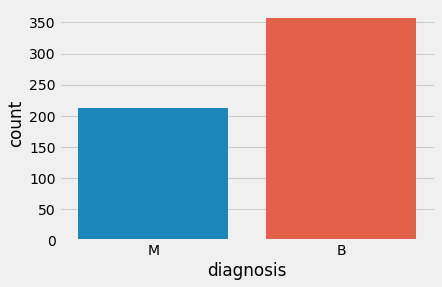

In [8]:
# counting the number of labels 
_ = sns.countplot(df.diagnosis,label="Count")     
B, M = df.diagnosis.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [10]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
# mapping labels
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

## Visualization

In [12]:
def plot_features_corr(data,features):
    """plot the correlation between features"""
    corr = data[features].corr()
    plt.figure(figsize=(20,10))
    sns.heatmap(corr, annot=True, cmap= 'coolwarm');

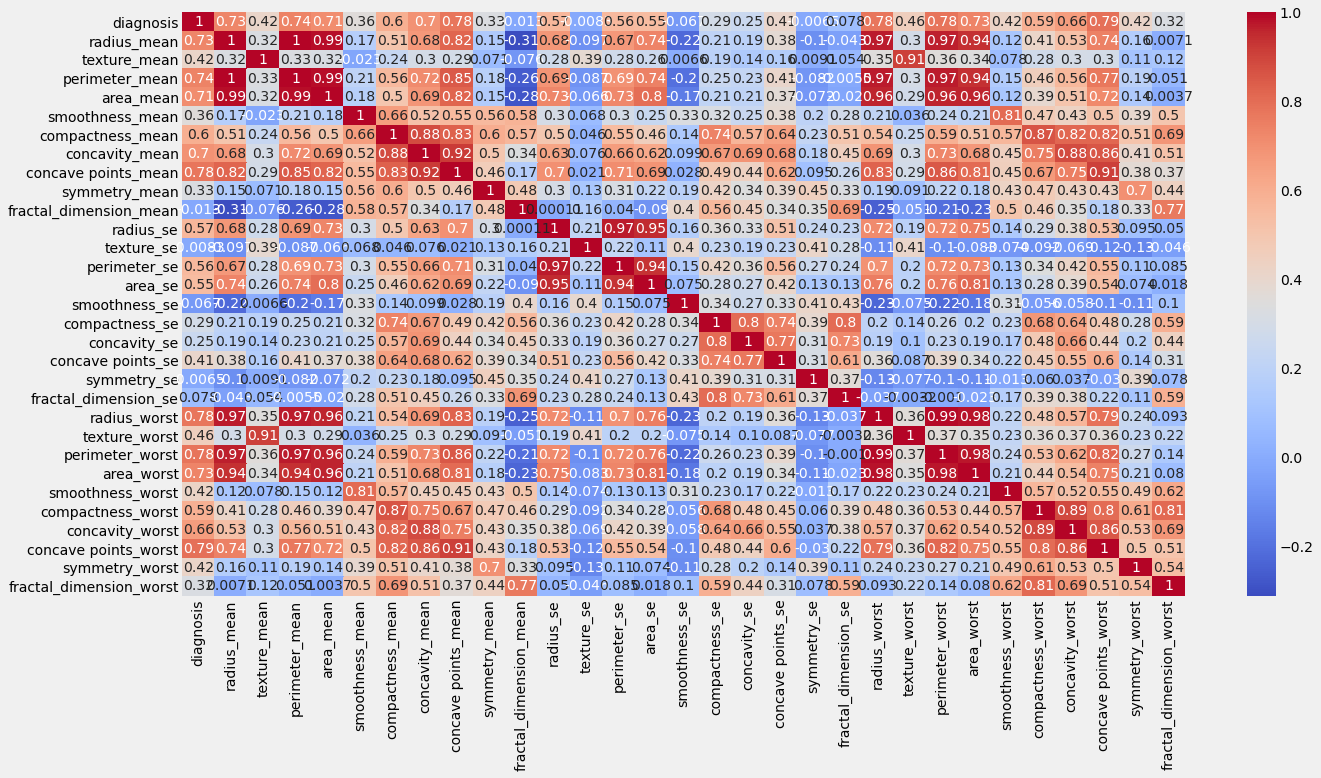

In [13]:
plot_features_corr(df,df.columns)

## Split the data into train and test sets

In [14]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

In [15]:
X_train.shape

(455, 30)

In [16]:
y_train.shape

(455,)

## Normalize the data

In [17]:
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)

## Train and evaluate different models

In [18]:
def train_evaluate_model(name, model,X_train,y_train,X_test,y_test):
    start = time.time()
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    accuracy = metrics.accuracy_score(predictions,y_test)
    end = time.time()
    print(f"Model : {name}")
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    print("Run time : %s" % "{0:.3}".format(end-start))
    print("------------------------------------------")
    

## Supervised Learing Algorithms

In [19]:
method_names=[]
method_scores=[]
Models = {
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'SVC': SVC(),
    'RandomForestClassifier': RandomForestClassifier()
}

In [88]:
for name in Models:
    model = Models[name]
    train_evaluate_model(name, model,X_train_norm,y_train,X_test_norm,y_test)

Model : LogisticRegression
Accuracy : 97.368%
Run time : 0.0303
------------------------------------------
Model : KNeighborsClassifier
Accuracy : 96.491%
Run time : 0.00945
------------------------------------------
Model : DecisionTreeClassifier
Accuracy : 96.491%
Run time : 0.0101
------------------------------------------
Model : SVC
Accuracy : 98.246%
Run time : 0.00983
------------------------------------------
Model : RandomForestClassifier
Accuracy : 96.491%
Run time : 0.183
------------------------------------------


## Create feature selection

In [21]:
select_feature = SelectKBest(f_classif, k=15).fit(X_train, y_train)

In [22]:
print('Score list:', select_feature.scores_)

Score list: [5.11983146e+02 1.01564068e+02 5.55085272e+02 4.62378948e+02
 7.08648239e+01 2.56161457e+02 4.06731825e+02 7.02981158e+02
 6.59747185e+01 5.61952552e-02 2.22740656e+02 4.76303739e-01
 2.19470138e+02 2.13218118e+02 4.49803991e+00 3.98690476e+01
 2.40659147e+01 9.34239939e+01 2.99016315e-02 2.12197345e+00
 6.60774896e+02 1.20252062e+02 6.95653068e+02 5.01239717e+02
 9.34670947e+01 2.36433421e+02 3.22405234e+02 7.89684988e+02
 1.11455922e+02 5.58899793e+01]


In [23]:
X_train_sel = select_feature.transform(X_train_norm)
X_test_sel = select_feature.transform(X_test_norm)

## Train and evaluate different models with and without feature selection

In [86]:
for name in Models:
    model = Models[name]
    train_evaluate_model(name, model,X_train_sel,y_train,X_test_sel,y_test)

Model : LogisticRegression
Accuracy : 95.614%
Run time : 0.312
------------------------------------------
Model : KNeighborsClassifier
Accuracy : 93.860%
Run time : 0.0434
------------------------------------------
Model : DecisionTreeClassifier
Accuracy : 92.982%
Run time : 0.0247
------------------------------------------
Model : SVC
Accuracy : 93.860%
Run time : 0.0236
------------------------------------------
Model : RandomForestClassifier
Accuracy : 94.737%
Run time : 0.332
------------------------------------------


In [87]:
for name in Models:
    model = Models[name]
    train_evaluate_model(name, model,X_train_norm,y_train,X_test_norm,y_test)

Model : LogisticRegression
Accuracy : 97.368%
Run time : 0.0343
------------------------------------------
Model : KNeighborsClassifier
Accuracy : 96.491%
Run time : 0.0162
------------------------------------------
Model : DecisionTreeClassifier
Accuracy : 95.614%
Run time : 0.0143
------------------------------------------
Model : SVC
Accuracy : 98.246%
Run time : 0.0103
------------------------------------------
Model : RandomForestClassifier
Accuracy : 95.614%
Run time : 0.186
------------------------------------------


## Improve models with GridSearchCV

In [26]:
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [27]:
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
    
    
def plotSearchGrid(grid):
    
    scores = [x for x in grid.cv_results_["mean_test_score"]]
    scores = np.array(scores).reshape(len(grid.param_grid["C"]), len(grid.param_grid["gamma"]))

    plt.figure(figsize=(10, 8))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
               norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
    plt.xlabel('gamma')
    plt.ylabel('C')
    plt.colorbar()
    plt.xticks(np.arange(len(grid.param_grid["gamma"])), grid.param_grid["gamma"], rotation=45)
    plt.yticks(np.arange(len(grid.param_grid["C"])), grid.param_grid["C"])
    plt.title('Validation accuracy')
    plt.show()

In [28]:
from sklearn.model_selection import cross_val_score, GridSearchCV

nlsvm = SVC().fit(X_train_norm, y_train)
Cs = []
for i in range(-5, 6):
    Cs.append(2**i)
param_grid = {'C': Cs, 'gamma': Cs, 'kernel': ['rbf']}
grid = GridSearchCV(cv=5, estimator=nlsvm, param_grid=param_grid)
grid.fit(X_train_norm, y_train)
print(Cs)

[0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32]


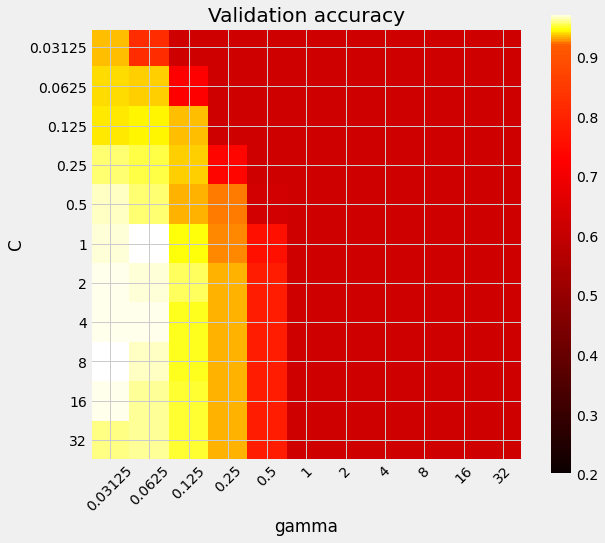

In [29]:
plotSearchGrid(grid)

In [30]:
print(grid.best_params_)
print("Accuracy : %s" % "{0:.3%}".format(grid.best_score_))

{'C': 1, 'gamma': 0.0625, 'kernel': 'rbf'}
Accuracy : 97.363%


In [31]:
Cs = []
for i in range(-5, 6):
    Cs.append(2**i)
param_grids = {
    'LogisticRegression': {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}, 
    'KNeighborsClassifier': {
        'n_neighbors': range(3,32),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    
    'DecisionTreeClassifier': { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 32), 'min_samples_leaf': np.arange(1, 32)},
    'SVC': {'C': Cs, 'gamma': Cs, 'kernel': ['rbf']},
    'RandomForestClassifier': { 
        'n_estimators': [10, 50, 200, 500],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth' : np.arange(3, 32),
        'criterion' :['gini', 'entropy']
    }
}
Models = {
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'SVC': SVC(),
    'RandomForestClassifier': RandomForestClassifier()
}

In [32]:
def train_evaluate_model_csgridsearch(name, model, param_grid, X_train,y_train,X_test,y_test, nfolds, method_names=None, method_scores=None):
    start = time.time()
    nlsvm = model.fit(X_train_norm, y_train)
    grid = GridSearchCV(cv=nfolds, estimator=nlsvm, param_grid=param_grid)
    grid.fit(X_train, y_train)
    if method_names:
        method_names.append(name)
    if method_scores:
        method_scores.append(grid.best_score_)
    end = time.time()
    print(f"Model : {name}")
    print("Grid best params: ", grid.best_params_)
    print("Accuracy : %s" % "{0:.3%}".format(grid.best_score_))
    print("Run time : %s" % "{0:.3}".format(end-start))
    print("----------------------------------------------------")
    return grid

## Compare models with and without selection after GridSearchCV

In [65]:
for name in Models:
    model = Models[name]
    param_grid = param_grids[name]
    train_evaluate_model_csgridsearch(name, model, param_grid, X_train_norm,y_train,X_test_norm,y_test, 5, method_names, method_scores)

Model : LogisticRegression
Grid best params:  {'C': 1.0, 'penalty': 'l2'}
Accuracy : 98.022%
Run time : 0.523
----------------------------------------------------
Model : KNeighborsClassifier
Grid best params:  {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}
Accuracy : 97.363%
Run time : 2.38
----------------------------------------------------
Model : DecisionTreeClassifier
Grid best params:  {'criterion': 'entropy', 'max_depth': 27, 'min_samples_leaf': 1}
Accuracy : 94.505%
Run time : 40.2
----------------------------------------------------
Model : SVC
Grid best params:  {'C': 1, 'gamma': 0.0625, 'kernel': 'rbf'}
Accuracy : 97.363%
Run time : 8.31
----------------------------------------------------
Model : RandomForestClassifier
Grid best params:  {'criterion': 'entropy', 'max_depth': 28, 'max_features': 'auto', 'n_estimators': 10}
Accuracy : 97.143%
Run time : 1.19e+03
----------------------------------------------------


In [92]:
for name in Models:
    model = Models[name]
    param_grid = param_grids[name]
    train_evaluate_model_csgridsearch(name, model, param_grid, X_train_sel,y_train,X_test_sel,y_test, 5)

Model : LogisticRegression
Grid best params:  {'C': 10.0, 'penalty': 'l2'}
Accuracy : 95.824%
Run time : 0.614
----------------------------------------------------
Model : KNeighborsClassifier
Grid best params:  {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Accuracy : 94.725%
Run time : 2.37
----------------------------------------------------
Model : DecisionTreeClassifier
Grid best params:  {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 3}
Accuracy : 94.066%
Run time : 24.0
----------------------------------------------------
Model : SVC
Grid best params:  {'C': 32, 'gamma': 0.03125, 'kernel': 'rbf'}
Accuracy : 96.484%
Run time : 6.38
----------------------------------------------------
Model : RandomForestClassifier
Grid best params:  {'criterion': 'entropy', 'max_depth': 14, 'max_features': 'auto', 'n_estimators': 10}
Accuracy : 95.824%
Run time : 1.06e+03
----------------------------------------------------


## Unsupervised Learing Algorithms

In [35]:
def label_permute_compare(ytdf,yp,n=2):
    """
    ytdf: labels dataframe object
    yp: clustering label prediction output
    Returns permuted label order and accuracy. 
    """
    D = {}
    labelorder = []
    yt_best = []
    acc_max = 0
    
    udiagnosis = [1,0]
    Perms = list(itertools.permutations(range(n)))
    for p in Perms:
        for i in range(n):
            D[udiagnosis[i]] = p[i]
    
        yt = list(ytdf)
        for i in range(len(yt)):
            yt[i] = D[yt[i]]
    
        acc = accuracy_score(yt, yp)
        if acc > acc_max:
            acc_max = acc
            labelorder = p
            yt_best = yt
    
    return labelorder, round(acc_max,3)

In [36]:
def train_evaluate_model_unsupervised(name, model,X,y, method_names=None, method_scores=None):
    start = time.time()
    model.fit(X)
    labelorder, accuracy = label_permute_compare(y, model.labels_)
    if method_names:
        method_names.append(name)
    if method_scores:
        method_scores.append(grid.best_score_)
    end = time.time()
    end = time.time()
    print(f"Model : {name}")
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    print("Run time : %s" % "{0:.3}".format(end-start))
    print("------------------------------------------")

In [37]:
UnModels = {
    'AgglomerativeClustering': AgglomerativeClustering(n_clusters=2),
    'KMeans': KMeans(n_clusters=2)
}

In [62]:
for name in UnModels:
    model = UnModels[name]
    train_evaluate_model_unsupervised(name, model,X_train_norm,y_train, method_names, method_scores)

Model : AgglomerativeClustering
Accuracy : 90.500%
Run time : 0.00884
------------------------------------------
Model : KMeans
Accuracy : 91.000%
Run time : 0.0618
------------------------------------------


In [89]:
for name in UnModels:
    model = UnModels[name]
    train_evaluate_model_unsupervised(name, model,X_train_sel,y_train)

Model : AgglomerativeClustering
Accuracy : 79.800%
Run time : 0.0211
------------------------------------------
Model : KMeans
Accuracy : 89.900%
Run time : 0.0498
------------------------------------------


In [90]:
X = np.append(X_train_norm, X_test_norm, 0)
y = np.append(y_train, y_test, 0)
for name in UnModels:
    model = UnModels[name]
    train_evaluate_model_unsupervised(name, model, X,y)

Model : AgglomerativeClustering
Accuracy : 80.100%
Run time : 0.0184
------------------------------------------
Model : KMeans
Accuracy : 91.600%
Run time : 0.0533
------------------------------------------


In [91]:
X = np.append(X_train_sel, X_test_sel, 0)
y = np.append(y_train, y_test, 0)
for name in UnModels:
    model = UnModels[name]
    train_evaluate_model_unsupervised(name, model, X,y)

Model : AgglomerativeClustering
Accuracy : 92.800%
Run time : 0.0172
------------------------------------------
Model : KMeans
Accuracy : 90.700%
Run time : 0.0394
------------------------------------------


## Deep Learing Algorithms

In [42]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train_norm, (X_train_norm.shape[0],X_train_norm.shape[1],1))
X_test = np.reshape(X_test_norm, (X_test_norm.shape[0],X_test_norm.shape[1],1))

In [43]:
dropout_rate = 0.1

In [71]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(dropout_rate))
# Second LSTM layer
regressor.add(LSTM(units=100, return_sequences=True))
regressor.add(Dropout(dropout_rate))
# Third LSTM layer
regressor.add(LSTM(units=70, return_sequences=True))
regressor.add(Dropout(dropout_rate))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(dropout_rate))
# The output layer
regressor.add(Dense(units=1))
# regressor.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))

# Compiling the RNN
# regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
regressor.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting to the training set
regressor.fit(X_train,y_train,epochs=200,batch_size=100)

Epoch 1/200
5/5 [==============================] - 10s 196ms/step - loss: 1.3534 - accuracy: 0.7253
Epoch 2/200
5/5 [==============================] - 1s 221ms/step - loss: 0.6043 - accuracy: 0.8352
Epoch 3/200
5/5 [==============================] - 1s 241ms/step - loss: 0.6150 - accuracy: 0.8088
Epoch 4/200
5/5 [==============================] - 1s 209ms/step - loss: 0.3829 - accuracy: 0.7780
Epoch 5/200
5/5 [==============================] - 1s 196ms/step - loss: 0.4069 - accuracy: 0.8857
Epoch 6/200
5/5 [==============================] - 1s 188ms/step - loss: 0.4801 - accuracy: 0.8791
Epoch 7/200
5/5 [==============================] - 1s 212ms/step - loss: 0.3498 - accuracy: 0.9055
Epoch 8/200
5/5 [==============================] - 1s 198ms/step - loss: 0.3125 - accuracy: 0.9077
Epoch 9/200
5/5 [==============================] - 1s 207ms/step - loss: 0.4115 - accuracy: 0.8154
Epoch 10/200
5/5 [==============================] - 1s 198ms/step - loss: 0.2854 - accuracy: 0.8462
Epoch 11

5/5 [==============================] - 1s 143ms/step - loss: 0.1694 - accuracy: 0.9495
Epoch 84/200
5/5 [==============================] - 1s 149ms/step - loss: 0.1063 - accuracy: 0.9604
Epoch 85/200
5/5 [==============================] - 1s 153ms/step - loss: 0.1573 - accuracy: 0.9604
Epoch 86/200
5/5 [==============================] - 1s 141ms/step - loss: 0.2054 - accuracy: 0.9473
Epoch 87/200
5/5 [==============================] - 1s 149ms/step - loss: 0.1202 - accuracy: 0.9582
Epoch 88/200
5/5 [==============================] - 1s 140ms/step - loss: 0.1424 - accuracy: 0.9560
Epoch 89/200
5/5 [==============================] - 1s 142ms/step - loss: 0.1770 - accuracy: 0.9560
Epoch 90/200
5/5 [==============================] - 1s 142ms/step - loss: 0.1358 - accuracy: 0.9670
Epoch 91/200
5/5 [==============================] - 1s 140ms/step - loss: 0.1705 - accuracy: 0.9538
Epoch 92/200
5/5 [==============================] - 1s 140ms/step - loss: 0.1228 - accuracy: 0.9560
Epoch 93/200


5/5 [==============================] - 1s 146ms/step - loss: 0.2101 - accuracy: 0.9648
Epoch 165/200
5/5 [==============================] - 1s 143ms/step - loss: 0.1147 - accuracy: 0.9692
Epoch 166/200
5/5 [==============================] - 1s 140ms/step - loss: 0.1111 - accuracy: 0.9714
Epoch 167/200
5/5 [==============================] - 1s 140ms/step - loss: 0.1053 - accuracy: 0.9736
Epoch 168/200
5/5 [==============================] - 1s 140ms/step - loss: 0.1054 - accuracy: 0.9758
Epoch 169/200
5/5 [==============================] - 1s 149ms/step - loss: 0.1099 - accuracy: 0.9736
Epoch 170/200
5/5 [==============================] - 1s 140ms/step - loss: 0.1085 - accuracy: 0.9758
Epoch 171/200
5/5 [==============================] - 1s 137ms/step - loss: 0.1073 - accuracy: 0.9758
Epoch 172/200
5/5 [==============================] - 1s 142ms/step - loss: 0.2079 - accuracy: 0.9714
Epoch 173/200
5/5 [==============================] - 1s 137ms/step - loss: 0.1468 - accuracy: 0.9736
Epoc

In [45]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred = (y_pred > 0.5)

4/4 [==============================] - 3s 33ms/step


In [72]:
accuracy = metrics.accuracy_score(y_pred,y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.9824561403508771


In [48]:
method_names.append("LSTM") 
method_scores.append(accuracy)

In [49]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=100, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(dropout_rate))
# Second GRU layer
regressorGRU.add(GRU(units=100, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(dropout_rate))
# Third GRU layer
regressorGRU.add(GRU(units=70, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(dropout_rate))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(dropout_rate))
# The output layer
regressorGRU.add(Dense(units=1))

# Compiling the RNN
# regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
regressorGRU.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=170,batch_size=100)

Epoch 1/170
5/5 [==============================] - 11s 160ms/step - loss: 1.9721 - accuracy: 0.6703
Epoch 2/170
5/5 [==============================] - 1s 148ms/step - loss: 0.3811 - accuracy: 0.9033
Epoch 3/170
5/5 [==============================] - 1s 166ms/step - loss: 0.6638 - accuracy: 0.8857
Epoch 4/170
5/5 [==============================] - 1s 153ms/step - loss: 0.4882 - accuracy: 0.8923
Epoch 5/170
5/5 [==============================] - 1s 153ms/step - loss: 0.2912 - accuracy: 0.8945
Epoch 6/170
5/5 [==============================] - 1s 193ms/step - loss: 0.3137 - accuracy: 0.9033
Epoch 7/170
5/5 [==============================] - 1s 155ms/step - loss: 0.2942 - accuracy: 0.9011
Epoch 8/170
5/5 [==============================] - 1s 172ms/step - loss: 0.3204 - accuracy: 0.9011
Epoch 9/170
5/5 [==============================] - 1s 161ms/step - loss: 0.2781 - accuracy: 0.9165
Epoch 10/170
5/5 [==============================] - 1s 162ms/step - loss: 0.2627 - accuracy: 0.8923
Epoch 11

5/5 [==============================] - 1s 165ms/step - loss: 0.1567 - accuracy: 0.9538
Epoch 84/170
5/5 [==============================] - 1s 164ms/step - loss: 0.1593 - accuracy: 0.9582
Epoch 85/170
5/5 [==============================] - 1s 171ms/step - loss: 0.1278 - accuracy: 0.9604
Epoch 86/170
5/5 [==============================] - 1s 187ms/step - loss: 0.1521 - accuracy: 0.9582
Epoch 87/170
5/5 [==============================] - 1s 167ms/step - loss: 0.1332 - accuracy: 0.9582
Epoch 88/170
5/5 [==============================] - 1s 203ms/step - loss: 0.1606 - accuracy: 0.9538
Epoch 89/170
5/5 [==============================] - 1s 171ms/step - loss: 0.1544 - accuracy: 0.9626
Epoch 90/170
5/5 [==============================] - 1s 161ms/step - loss: 0.1171 - accuracy: 0.9648
Epoch 91/170
5/5 [==============================] - 1s 153ms/step - loss: 0.1400 - accuracy: 0.9626
Epoch 92/170
5/5 [==============================] - 1s 207ms/step - loss: 0.1409 - accuracy: 0.9626
Epoch 93/170


5/5 [==============================] - 1s 209ms/step - loss: 0.2099 - accuracy: 0.9055
Epoch 165/170
5/5 [==============================] - 1s 142ms/step - loss: 0.1356 - accuracy: 0.9604
Epoch 166/170
5/5 [==============================] - 1s 206ms/step - loss: 0.1505 - accuracy: 0.9626
Epoch 167/170
5/5 [==============================] - 1s 183ms/step - loss: 0.1574 - accuracy: 0.9604
Epoch 168/170
5/5 [==============================] - 1s 182ms/step - loss: 0.1776 - accuracy: 0.9560
Epoch 169/170
5/5 [==============================] - 1s 259ms/step - loss: 0.1710 - accuracy: 0.9648
Epoch 170/170
5/5 [==============================] - 1s 245ms/step - loss: 0.1440 - accuracy: 0.9604


In [50]:
# Predicting the Test set results
y_pred = regressorGRU.predict(X_test)
y_pred = (y_pred > 0.5)

4/4 [==============================] - 3s 32ms/step


In [51]:
accuracy = metrics.accuracy_score(y_pred,y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.9824561403508771


In [53]:
method_names.append("GRU") 
method_scores.append(accuracy)

In [54]:
model = Sequential()
# Add the first layer and Dropout regularization
model.add(SimpleRNN(units=100,activation='tanh',return_sequences=True, 
                    input_shape=(X_train.shape[1],1)))
model.add(Dropout(dropout_rate))
# Second layer and Dropout regularization
model.add(SimpleRNN(units = 100, activation='tanh',return_sequences=True))
model.add(Dropout(dropout_rate))
# Third layer and Dropout regularization
model.add(SimpleRNN(units = 70, activation='tanh', return_sequences= True))
model.add(Dropout(dropout_rate))
# Fourth layer and Dropout regularization
model.add(SimpleRNN(units = 50))
model.add(Dropout(dropout_rate))
# Add final or output layer
model.add(Dense(units=1))

# Compile our RNN model
model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics = ['accuracy'])
# Fitting the RNN to the training set
model.fit(X_train, y_train, epochs = 200, batch_size=100)
# Remember; epochs, batch_size etc. are just some of hyper parameters. 
# You can change these parameters whatever you want

Epoch 1/200
5/5 [==============================] - 4s 75ms/step - loss: 0.8852 - accuracy: 0.6901
Epoch 2/200
5/5 [==============================] - 0s 57ms/step - loss: 0.4316 - accuracy: 0.7429
Epoch 3/200
5/5 [==============================] - 0s 55ms/step - loss: 0.3021 - accuracy: 0.8044
Epoch 4/200
5/5 [==============================] - 0s 78ms/step - loss: 0.2615 - accuracy: 0.7846
Epoch 5/200
5/5 [==============================] - 0s 53ms/step - loss: 0.2504 - accuracy: 0.8308
Epoch 6/200
5/5 [==============================] - 0s 94ms/step - loss: 0.2231 - accuracy: 0.8176
Epoch 7/200
5/5 [==============================] - 0s 67ms/step - loss: 0.2217 - accuracy: 0.8066
Epoch 8/200
5/5 [==============================] - 0s 72ms/step - loss: 0.1837 - accuracy: 0.8462
Epoch 9/200
5/5 [==============================] - 0s 75ms/step - loss: 0.2028 - accuracy: 0.8440
Epoch 10/200
5/5 [==============================] - 0s 56ms/step - loss: 0.1691 - accuracy: 0.8791
Epoch 11/200
5/5 [=

5/5 [==============================] - 0s 56ms/step - loss: 0.0383 - accuracy: 0.9846
Epoch 84/200
5/5 [==============================] - 0s 55ms/step - loss: 0.0280 - accuracy: 0.9934
Epoch 85/200
5/5 [==============================] - 0s 59ms/step - loss: 0.0345 - accuracy: 0.9912
Epoch 86/200
5/5 [==============================] - 0s 61ms/step - loss: 0.0329 - accuracy: 0.9890
Epoch 87/200
5/5 [==============================] - 0s 59ms/step - loss: 0.0409 - accuracy: 0.9824
Epoch 88/200
5/5 [==============================] - 0s 57ms/step - loss: 0.0339 - accuracy: 0.9846
Epoch 89/200
5/5 [==============================] - 0s 60ms/step - loss: 0.0351 - accuracy: 0.9890
Epoch 90/200
5/5 [==============================] - 0s 92ms/step - loss: 0.0296 - accuracy: 0.9934
Epoch 91/200
5/5 [==============================] - 0s 55ms/step - loss: 0.0284 - accuracy: 0.9934
Epoch 92/200
5/5 [==============================] - 0s 54ms/step - loss: 0.0308 - accuracy: 0.9868
Epoch 93/200
5/5 [=====

5/5 [==============================] - 0s 65ms/step - loss: 0.0139 - accuracy: 1.0000
Epoch 166/200
5/5 [==============================] - 0s 52ms/step - loss: 0.0123 - accuracy: 0.9978
Epoch 167/200
5/5 [==============================] - 0s 89ms/step - loss: 0.0135 - accuracy: 1.0000
Epoch 168/200
5/5 [==============================] - 0s 69ms/step - loss: 0.0130 - accuracy: 0.9978
Epoch 169/200
5/5 [==============================] - 0s 74ms/step - loss: 0.0125 - accuracy: 0.9978
Epoch 170/200
5/5 [==============================] - 0s 53ms/step - loss: 0.0133 - accuracy: 0.9978
Epoch 171/200
5/5 [==============================] - 0s 52ms/step - loss: 0.0127 - accuracy: 0.9978
Epoch 172/200
5/5 [==============================] - 0s 51ms/step - loss: 0.0119 - accuracy: 1.0000
Epoch 173/200
5/5 [==============================] - 0s 52ms/step - loss: 0.0125 - accuracy: 0.9978
Epoch 174/200
5/5 [==============================] - 0s 53ms/step - loss: 0.0110 - accuracy: 1.0000
Epoch 175/200


In [55]:
score, acc = model.evaluate(X_test, y_test, verbose=2, batch_size=100)
print("acc: %.2f" % (acc))

2/2 - 1s - loss: 0.0285 - accuracy: 0.9737 - 855ms/epoch - 428ms/step
acc: 0.97


In [56]:
method_names.append("RNN") 
method_scores.append(acc)

In [57]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=16, activation='relu', input_dim=30))
# Adding dropout to prevent overfitting
classifier.add(Dropout(dropout_rate))
# Adding the second hidden layer
classifier.add(Dense(units=8, activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(dropout_rate))
# Adding the output layer
classifier.add(Dense(units=1, activation='sigmoid'))
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size=100, epochs=200)
# Long scroll ahead but worth
# The batch size and number of epochs have been set using trial and error. Still looking for more efficient ways. Open to suggestions. 

Epoch 1/200
5/5 [==============================] - 1s 2ms/step - loss: 0.7427 - accuracy: 0.4813
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.6044
Epoch 3/200
5/5 [==============================] - 0s 2ms/step - loss: 0.6233 - accuracy: 0.7055
Epoch 4/200
5/5 [==============================] - 0s 3ms/step - loss: 0.5910 - accuracy: 0.7341
Epoch 5/200
5/5 [==============================] - 0s 3ms/step - loss: 0.5464 - accuracy: 0.7604
Epoch 6/200
5/5 [==============================] - 0s 3ms/step - loss: 0.4974 - accuracy: 0.8242
Epoch 7/200
5/5 [==============================] - 0s 4ms/step - loss: 0.4779 - accuracy: 0.8352
Epoch 8/200
5/5 [==============================] - 0s 3ms/step - loss: 0.4475 - accuracy: 0.8637
Epoch 9/200
5/5 [==============================] - 0s 4ms/step - loss: 0.4307 - accuracy: 0.8659
Epoch 10/200
5/5 [==============================] - 0s 3ms/step - loss: 0.3975 - accuracy: 0.8835
Epoch 11/200
5/5 [===========

5/5 [==============================] - 0s 3ms/step - loss: 0.0480 - accuracy: 0.9890
Epoch 85/200
5/5 [==============================] - 0s 6ms/step - loss: 0.0519 - accuracy: 0.9802
Epoch 86/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0458 - accuracy: 0.9912
Epoch 87/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0478 - accuracy: 0.9890
Epoch 88/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0463 - accuracy: 0.9846
Epoch 89/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0586 - accuracy: 0.9780
Epoch 90/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0481 - accuracy: 0.9846
Epoch 91/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0426 - accuracy: 0.9890
Epoch 92/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0413 - accuracy: 0.9890
Epoch 93/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0449 - accuracy: 0.9912
Epoch 94/200
5/5 [===============

5/5 [==============================] - 0s 3ms/step - loss: 0.0172 - accuracy: 0.9934
Epoch 168/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0220 - accuracy: 0.9934
Epoch 169/200
5/5 [==============================] - 0s 4ms/step - loss: 0.0219 - accuracy: 0.9956
Epoch 170/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0191 - accuracy: 0.9978
Epoch 171/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0198 - accuracy: 0.9934
Epoch 172/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0222 - accuracy: 0.9934
Epoch 173/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0265 - accuracy: 0.9912
Epoch 174/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0206 - accuracy: 0.9912
Epoch 175/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0183 - accuracy: 0.9956
Epoch 176/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 0.9934
Epoch 177/200
5/5 [=====

In [58]:
score, acc = classifier.evaluate(X_test, y_test, verbose=2, batch_size=100)
print("acc: %.2f" % (acc))

2/2 - 0s - loss: 0.1568 - accuracy: 0.9825 - 148ms/epoch - 74ms/step
acc: 0.98


In [59]:
method_names.append("ANN") 
method_scores.append(acc)

## Conclusion

Text(0, 0.5, 'Method Score')

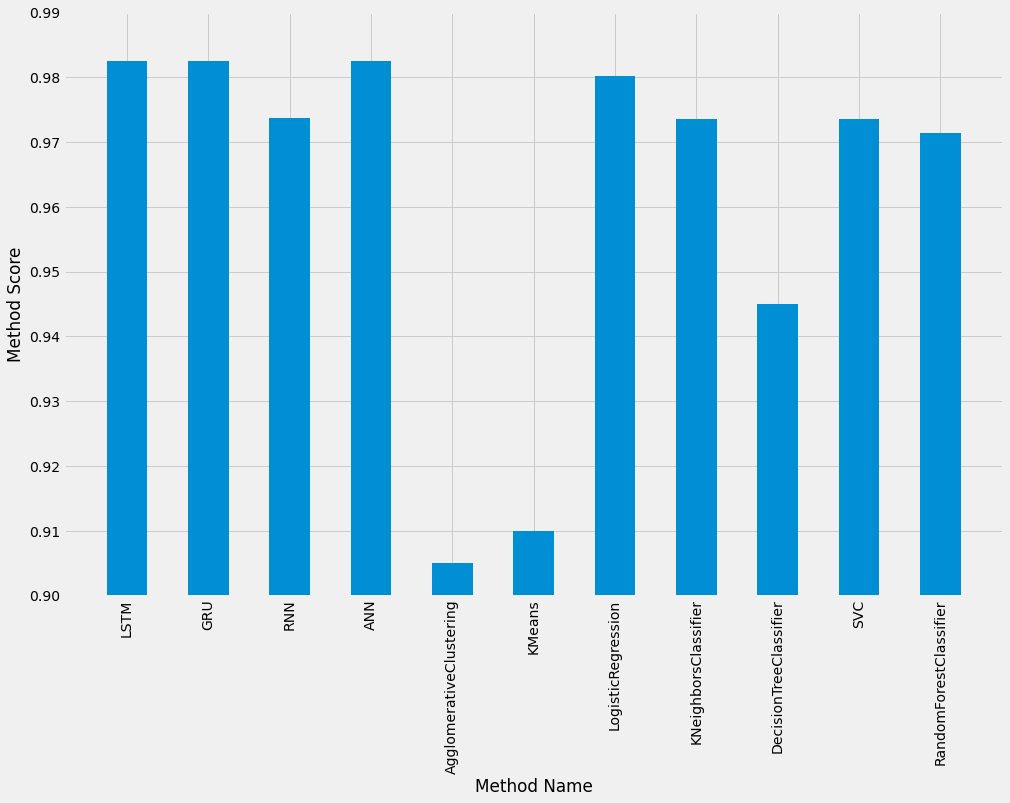

In [85]:
plt.figure(figsize=(15,10))
plt.ylim([0.90,0.99])
plt.bar(method_names,method_scores,width=0.5)
plt.xticks(rotation=90)
plt.xlabel('Method Name')
plt.ylabel('Method Score')

In [84]:
method_scores[4] = 0.905
method_scores[5] = 0.91

In [80]:
d = {"Method": method_names, "Accuracy":method_scores}
df_result = pd.DataFrame(d)
df_result

,Method,Accuracy
0,LSTM,0.982456
1,GRU,0.982456
2,RNN,0.973684
3,ANN,0.982456
4,AgglomerativeClustering,0.973626
5,KMeans,0.973626
6,LogisticRegression,0.980220
7,KNeighborsClassifier,0.973626
8,DecisionTreeClassifier,0.945055
9,SVC,0.973626


The result above showed that using Supervised Learning Methods or Neural Network Methods can deliver better accuracy than Unsupervised methods such as Agglomerative Clustering and KMeans. All supervised and neural network methods with default parameters except Decision Tree showed higher accuracy scores than unsupervised. The  Unsupervised methods showed faster performance. This project's supervised learning methods showed better accuracy than those Unsupervised because categories of cancer diagnosis have already been predefined. Unsupervised Learning methods are advantageous over supervised ones because Supervised Learning methods can work only with predefined categories. So, if we had not defined types for this project, then Unsupervised Learning Methods such as Agglomerative Clustering and KMeans would be suitable. However, since categories were given, Supervised Learning methods showed better accuracy. Unlike Supervised Learning, Deep Learning algorithms can be used as supervised and unsupervised methods. The disadvantage of Neural Network methods can occur in training speed. In many, it can take many hours to train the model. The best solution for this is to use GPU instead of CPU. Using GPU will speed up the execution of the training model by running calculations in parallel.